In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor

In [2]:
class CNNBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            # Convolutional layers with Batch Normalization
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),  # Added
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),  # Added
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # Flatten
            nn.Flatten(),

            # Fully connected layers
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.model(x)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

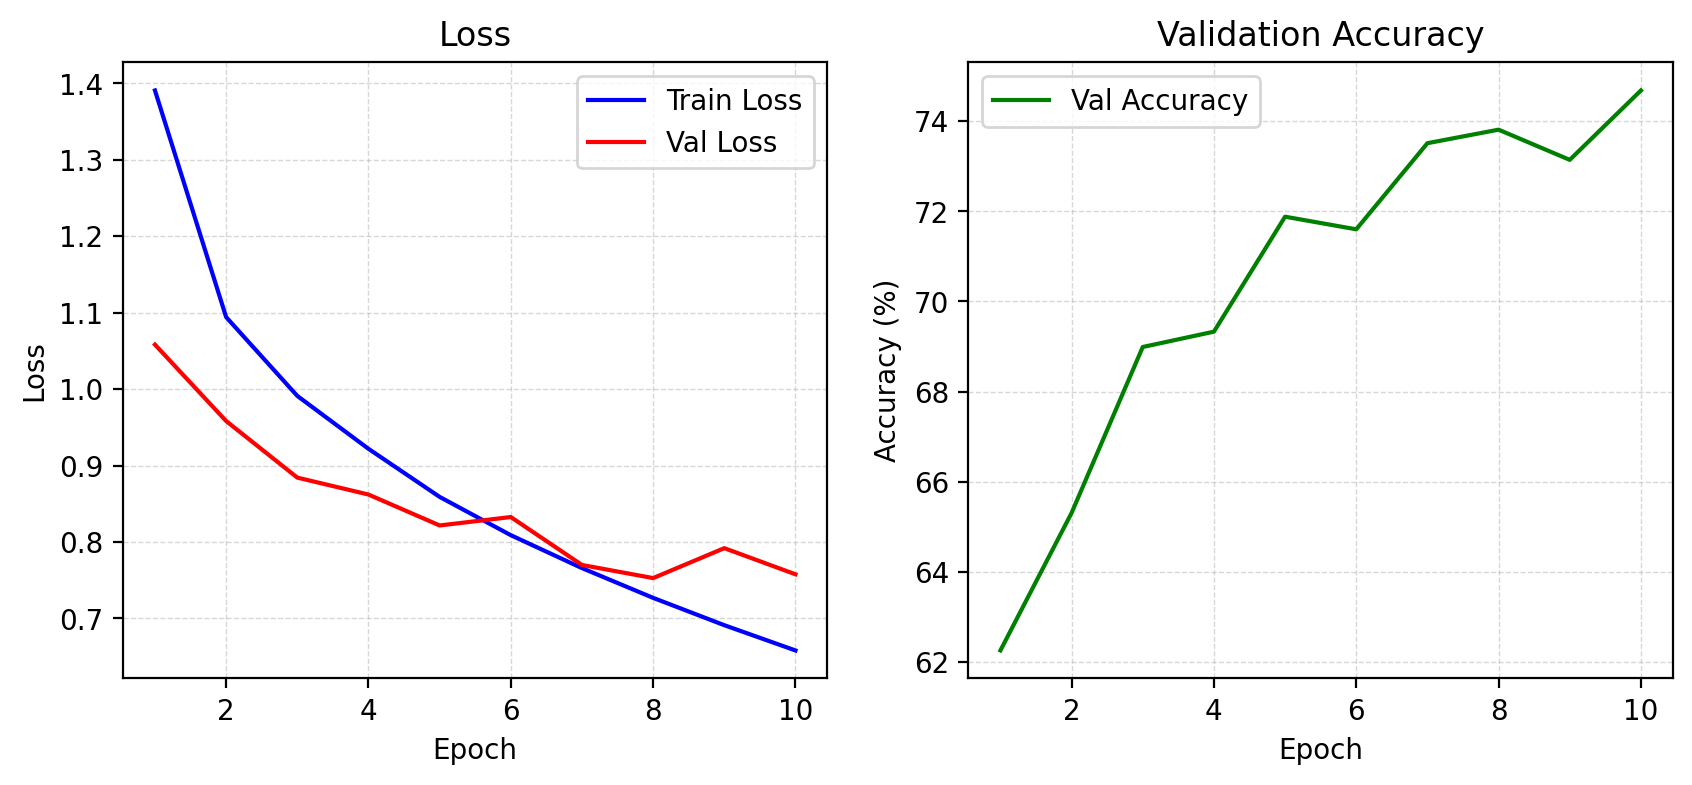

Epoch 10/10: 100%|##########| 10/10 [01:06<00:00,  6.62s/it, Train Loss: 0.6581, Val Loss: 0.7577, Val Acc: 74…

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.3907       |       1.0582       |         62.2600         |
|         2          |       1.0942       |       0.9583       |         65.3100         |
|         3          |       0.9911       |       0.8842       |         68.9900         |
|         4          |       0.9219       |       0.8621       |         69.3300         |
|         5          |       0.8590       |       0.8216       |         71.8800         |
|         6          |       0.8089       |       0.8326       |         71.6000         |
|         7          |       0.7658       |       0.7699       |         73.5100         |
|         8          |       0.7269       |       0.7528       |         73.8100         |
|         9          |       0.6911       |       0.7919       |         73.1400         |

In [3]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNBatchNorm().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
